In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [78]:
X,y=make_blobs(n_samples=1000,centers=3,random_state=40,n_features=2)

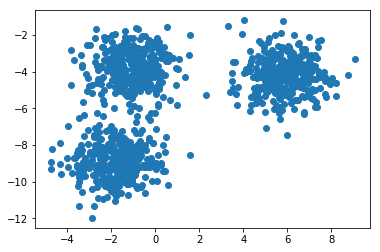

In [79]:
plt.scatter(X[:,0],X[:,1])

In [80]:
ovr_class = LogisticRegression(penalty='l2',fit_intercept=True,class_weight='balanced',solver='lbfgs',random_state=42,
                              multi_class='ovr').fit(X,y)

In [81]:
print("training score : %.3f (%s)" % (ovr_class.score(X, y), 'ovr'))

training score : 0.992 (ovr)


In [82]:
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z=ovr_class.predict(np.c_[xx.ravel(),yy.ravel()])
Z

array([0, 0, 0, ..., 1, 1, 1])

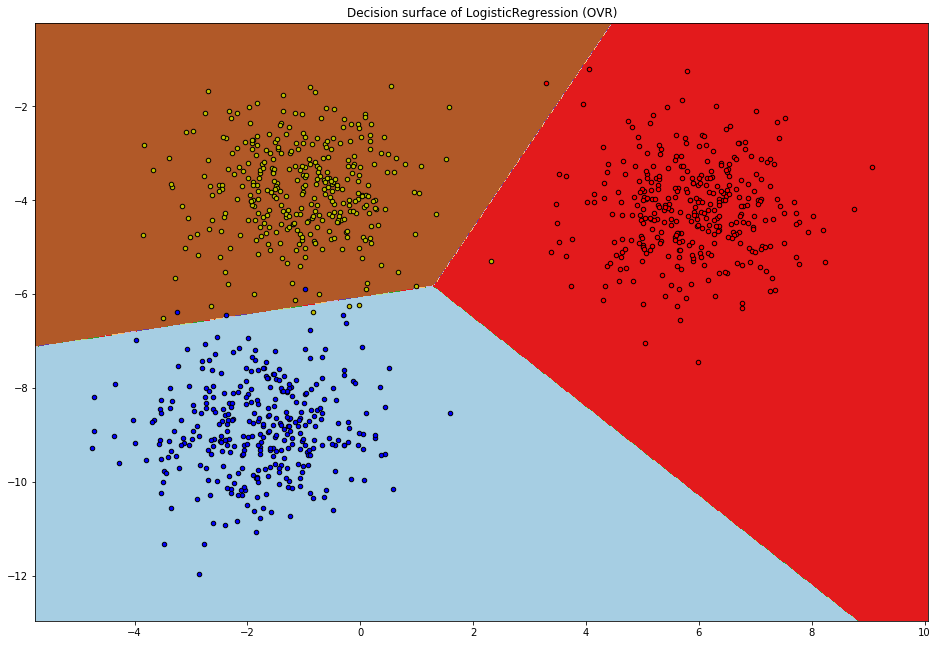

In [83]:
Z=Z.reshape(xx.shape)
plt.figure(figsize=(16,11))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % 'OVR')
plt.axis('tight')
colors = "bry"
for i, color in zip(ovr_class.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

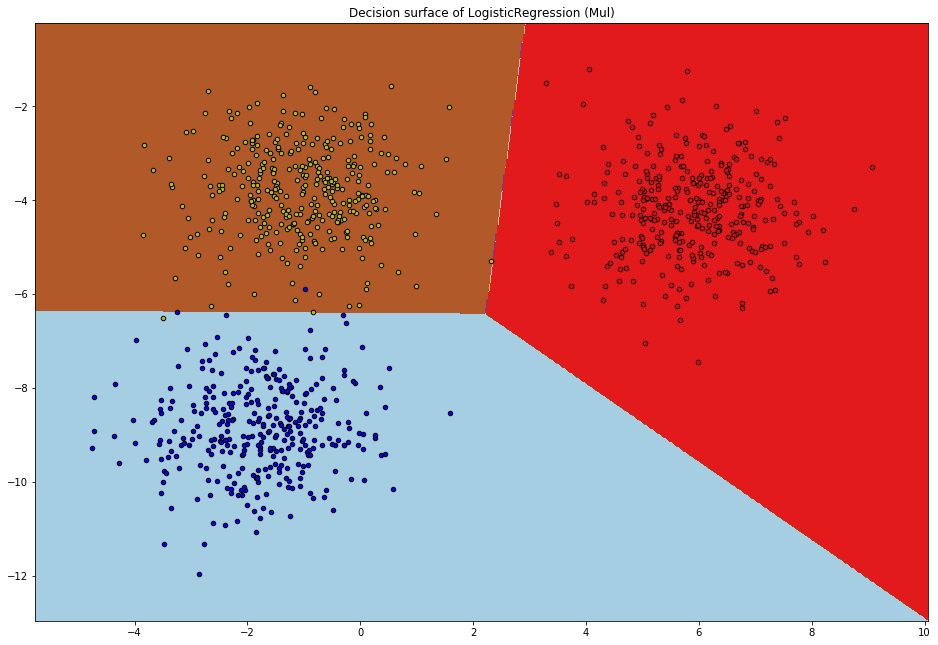

In [84]:
mul_class = LogisticRegression(penalty='l2',fit_intercept=True,class_weight='balanced',solver='lbfgs',random_state=42,
                              multi_class='multinomial').fit(X,y)
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z=mul_class.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure(figsize=(16,11))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % 'Mul')
plt.axis('tight')
colors = "bry"
for i, color in zip(mul_class.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

[1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


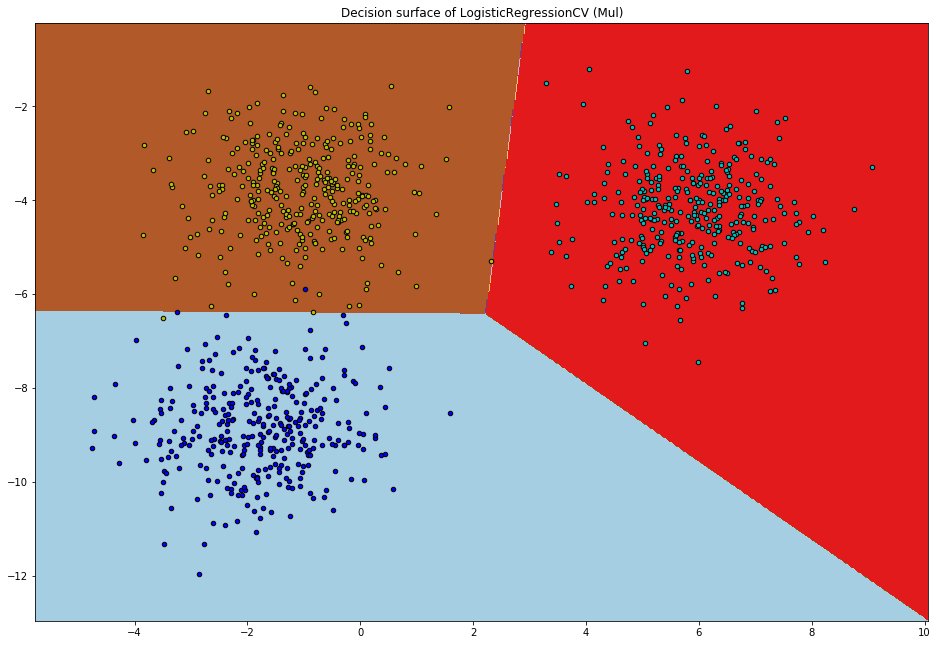

In [85]:
from sklearn.linear_model import LogisticRegressionCV
mul_class = LogisticRegressionCV(penalty='l2',fit_intercept=True,class_weight='balanced',solver='lbfgs',random_state=42,
                              multi_class ='multinomial',cv=20,Cs=[0.1,1,10,100,1000]).fit(X,y)
print(mul_class.Cs_)
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z=mul_class.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure(figsize=(16,11))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegressionCV (%s)" % 'Mul')
plt.axis('tight')
colors = "bcy"
for i, color in zip(mul_class.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

In [95]:
mul_class.predict_proba(X)

array([[1.22149294e-05, 9.99743453e-01, 2.44332361e-04],
       [9.84390692e-10, 9.99998380e-01, 1.61938324e-06],
       [9.99997174e-01, 1.30742074e-10, 2.82621013e-06],
       ...,
       [6.19242120e-08, 9.99915884e-01, 8.40541786e-05],
       [9.99981082e-01, 2.06274746e-10, 1.89180740e-05],
       [9.47674392e-01, 3.59475797e-08, 5.23255719e-02]])

In [96]:
mul_class.classes_

array([0, 1, 2])

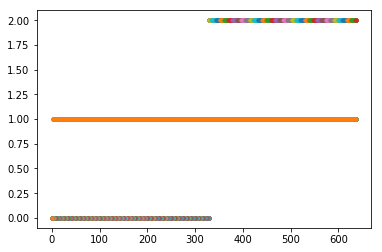

In [88]:
plt.plot(Z,marker='.',linestyle='none')